In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import warnings

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Supress warnings
warnings.filterwarnings(
    action="ignore",
    module="pandas",
    message="^internal gelsd"
)

In [2]:
#raw = pd.read_json('data/Musical_Instruments_5.json')

#with open('data/Musical_Instruments_5.json') as f:
#    data = f.readlines()

#raw = pd.DataFrame(data)
#raw = pd.read_json(data, lines = True)
raw = pd.read_json('data/Musical_Instruments_5.json', lines = True)
raw.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800


In [3]:
#Lets create our features and outcome
raw['positiveReview'] = np.where(raw['overall'] >= 4, True, False)
#data['positiveReview'] = np.where(raw['overall'] >= 4, True, False)
Y = np.where(raw['overall'] >= 4, True, False)

data = raw[['helpful', 'reviewText', 'summary']]
data['positiveReview'] = Y

#create helpfulScore array
helpfulScore = []
for entry in data['helpful']:
    helpfulScore.append(entry[0] - entry[1])
    
data['helpfulScore'] = helpfulScore
data['isHelpful'] = np.where(data['helpfulScore'] >= 0, True, False)

data.drop(columns = ['helpful', 'helpfulScore'], inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [4]:
#Keyword strings:
keywords = ['good', 'great', 'awesome', 'bad', 'exactly', 'horrib', 'wonder']

for key in keywords:
    data[str(key)] = data.reviewText.str.contains(str(key), case = False) | data.summary.str.contains(str(key), case = False)

data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,reviewText,summary,positiveReview,isHelpful,good,great,awesome,bad,exactly,horrib,wonder
0,"Not much to write about here, but it does exac...",good,True,True,True,False,False,False,True,False,False
1,The product does exactly as it should and is q...,Jake,True,False,False,False,False,False,True,False,False
2,The primary job of this device is to block the...,It Does The Job Well,True,True,False,False,False,False,False,False,False
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,True,True,True,False,False,False,False,False,False
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,True,True,False,True,False,False,False,False,False


In [5]:
#Set up Data, X, Y
X = data[['isHelpful'] + keywords]
#Y = data['positiveReview']

data.head()

,reviewText,summary,positiveReview,isHelpful,good,great,awesome,bad,exactly,horrib,wonder
0,"Not much to write about here, but it does exac...",good,True,True,True,False,False,False,True,False,False
1,The product does exactly as it should and is q...,Jake,True,False,False,False,False,False,True,False,False
2,The primary job of this device is to block the...,It Does The Job Well,True,True,False,False,False,False,False,False,False
3,Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,True,True,True,False,False,False,False,False,False
4,This pop filter is great. It looks and perform...,No more pops when I record my vocals.,True,True,False,True,False,False,False,False,False


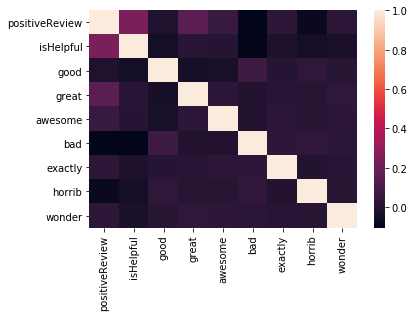

In [6]:
sns.heatmap(data.corr())

__Correlation__

What we want to see in our correlation matrix is a strong correlation (positive or negative) between each feature and the outcome and weak intercorrelation between the features. While we aren't seeing a ton of intercorrelation between the features, the correlation between the features and the outcome isn't particularly strong. Part of this may be in finding better keywords and features to implement. But let us continue with our modeling.

In [7]:
#Train naive bayes and validate
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X, Y)

Y_predicted = bnb.predict(X)

print('{} mislabeled points out of {}.'. format((Y != Y_predicted).sum(), X.shape[0]))

print('\nConfusion Matrix:\n{}'.format(confusion_matrix(Y, Y_predicted)))

1225 mislabeled points out of 10261.

Confusion Matrix:
[[  60 1179]
 [  46 8976]]


__Model Validation__

The main problem we are facing with this dataset is the number of 'non-positive' reviews outnumber the number of 'positive' reviews nearly by a magnitude, so our model tends to mark more positive reviews as negative reviews, maintaining net accuracy.

This type of issue is called "class imbalance". We can combat our class imbalance by deliberately oversampling the lesser reviews.

In [8]:
#Split into two groups
positives = data[data['positiveReview'] == True]
negatives = data[data['positiveReview'] == False]

#Print lengths
print(positives.shape[0]) #9022
print(negatives.shape[0]) #1239

#Sample largest class (n = size of smallest class)
pos_samp = positives.sample(n = negatives.shape[0])

#Create new balanced dataset
data_balanced = pos_samp.append(negatives, ignore_index = True)

#Scramble dataset observations.
data_balanced = data_balanced.sample(frac = 1).reset_index(drop = True)

data_balanced.head()

9022
1239


,reviewText,summary,positiveReview,isHelpful,good,great,awesome,bad,exactly,horrib,wonder
0,"This works, and I really like Evans. But I got...","Works, not great.",False,True,False,True,False,False,False,False,False
1,I've noticed that the two-button tremelo/vibra...,Replacement for original.,False,True,False,False,False,False,False,False,False
2,Installed these on my Schecter C-1 Hellraiser....,Another gimmick for guitars!,False,False,True,False,False,True,False,False,False
3,It's not bad. It would be better if I bought o...,It's decent,False,True,False,False,False,True,False,False,False
4,Warning the tuners have two bumps instead of o...,Great Beautiful Tuners!,True,True,False,True,False,True,False,False,False


In [9]:
#Create new balanced outcome and features.
X_bal = data_balanced[['isHelpful'] + keywords]
Y_bal = data_balanced['positiveReview']

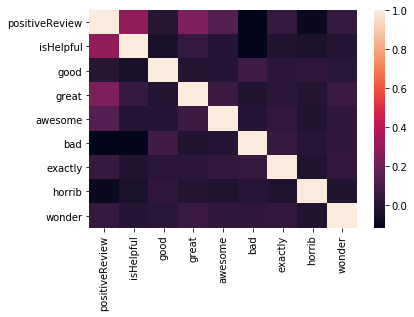

In [10]:
#Recheck features
sns.heatmap(data_balanced.corr())

__Finding our balance__

As we can see by our correlation matrix, balancing our classes seems to have improved correlation between the outcome and our features. Both the class balancing and the 'sharpening' of our correlation matrix should improve the results.

In [11]:
#Initiate a new model
bnb_bal = BernoulliNB()
bnb_bal.fit(X_bal, Y_bal)

Y_bal_predicted = bnb_bal.predict(X_bal)

print('{} mislabeled points out of {}.'. format((Y_bal != Y_bal_predicted).sum(), X_bal.shape[0]))

print('\nConfusion Matrix:\n{}'.format(confusion_matrix(Y_bal, Y_bal_predicted)))

889 mislabeled points out of 2478.

Confusion Matrix:
[[ 502  737]
 [ 152 1087]]


__Bernoulli: Balanced__

As we can see by the confusion matrix, error types are much more balanced. Net accuracy has also been improved. With further keyword and feature selection, we may continue to improve our model.

__On Overfitting__

One last potential issue we want to check for is overfitting.

Overfitting occurs when the model starts to account for random noise rather than the true underlying relationships in the data. We can check to see if overfitting is occuring by splitting the data into training and testing batches. We will then train our model on one of the batches and test the model on the other.

In [12]:
#Make a holdout group
X_train, X_test, Y_train, Y_test = train_test_split(X_bal, Y_bal, test_size = 0.1)

bnb_val = BernoulliNB()
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.6169354838709677

Here we train the model on 50% of the data and test it on the other 50%. This implies that our model is not overfitting.

In [13]:
from sklearn.model_selection import cross_val_score

#Fresh, untrained model
bnb_flds = BernoulliNB()

cross_val_score(bnb_flds, X_bal, Y_bal, cv = 5)

array([0.57459677, 0.64112903, 0.63306452, 0.6391129 , 0.64777328])

__Analysis__

When we implemented the holdout group, we saw a significant drop in accuracy. This could imply that we are seeing some overfitting. We are seeing some variance within our cross validation scores which could also imply overfitting.

Although the variance is not strong enough to be absolutely certain, as we aren't using a particularly complex model (we are using less than 10 features), I suspect more feature engineering would improve the accuracy.